### Neural network classification

### 1. Make classification data and get it ready

In [ ]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)



In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"Five first samples of X:\n {X[:5]}")
print(f"Five first samples of y:\n {y[:5]}")

Five first samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Five first samples of y:
 [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


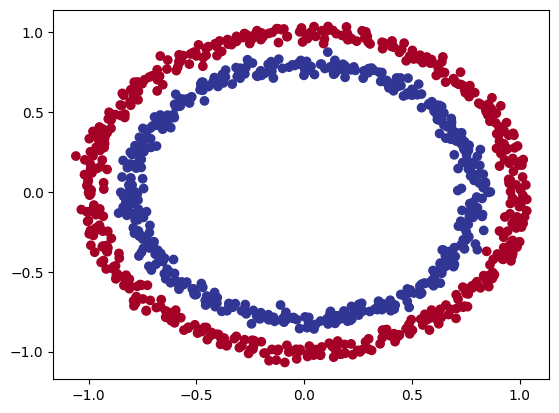

In [ ]:
# Visulize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
# View the first example of features and lables
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import make_circles


# Construct a model that subclass nn.Modul
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))


model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Let's replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386],
                      [-0.6007,  0.5459],
                      [ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265,  0.3591,
                      -0.4310, -0.7000], device='cuda:0')),
             ('2.weight',
              tensor([[-0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,  0.2475,
                       -0.2247,  0.0199],
                      [-0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874, -0.1886,
                       -0.1886,  0.2844],
                      [ 0.1054,  0.3043, -0.2610, -0.313

In [ ]:
# Make prediction
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
# Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [ ]:
# Calculate accuracy - out of 100 examples, what precentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

### Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's **prediction probabilities** to **prediction labels** by either rounding them or taking the `argmax()`

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test[:5].to(device))
y_logits

tensor([[ 0.0089],
        [-0.0154],
        [ 0.0231],
        [ 0.0010],
        [-0.0729]], device='cuda:0')

In [ ]:
# Use the sigmoid activation function
y_preds_prob = torch.sigmoid(y_logits)
y_preds_prob


tensor([[0.5022],
        [0.4962],
        [0.5058],
        [0.5002],
        [0.4818]], device='cuda:0')

In [ ]:
y_preds = torch.round(y_preds_prob)
print(torch.eq(y_preds.squeeze(), y_test[:5].to(device)))

tensor([ True,  True,  True, False, False], device='cuda:0')


In [ ]:
# Building train loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2500

# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(y_logits)

  # Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward (backproragation)
  loss.backward()

  # Optimizerstep (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()

  with torch.inference_mode():
    # Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(test_logits)

    # Calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss: .5f}, Acc: {acc: .2f}% | Test loss: {test_loss: .5f}, Test Acc: {test_acc: .2f}%")


Epoch: 0 | Loss:  0.69270, Acc:  50.00% | Test loss:  0.69225, Test Acc:  50.00%
Epoch: 10 | Loss:  0.69218, Acc:  50.00% | Test loss:  0.69183, Test Acc:  50.00%
Epoch: 20 | Loss:  0.69190, Acc:  50.00% | Test loss:  0.69157, Test Acc:  50.00%
Epoch: 30 | Loss:  0.69168, Acc:  50.00% | Test loss:  0.69136, Test Acc:  50.00%
Epoch: 40 | Loss:  0.69149, Acc:  50.00% | Test loss:  0.69116, Test Acc:  50.00%
Epoch: 50 | Loss:  0.69130, Acc:  50.00% | Test loss:  0.69098, Test Acc:  50.00%
Epoch: 60 | Loss:  0.69111, Acc:  50.00% | Test loss:  0.69080, Test Acc:  50.00%
Epoch: 70 | Loss:  0.69093, Acc:  50.00% | Test loss:  0.69061, Test Acc:  50.00%
Epoch: 80 | Loss:  0.69075, Acc:  50.00% | Test loss:  0.69042, Test Acc:  50.00%
Epoch: 90 | Loss:  0.69058, Acc:  50.00% | Test loss:  0.69023, Test Acc:  50.00%
Epoch: 100 | Loss:  0.69040, Acc:  50.00% | Test loss:  0.69003, Test Acc:  50.00%
Epoch: 110 | Loss:  0.69022, Acc:  50.00% | Test loss:  0.68982, Test Acc:  50.00%
Epoch: 120 | Lo

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


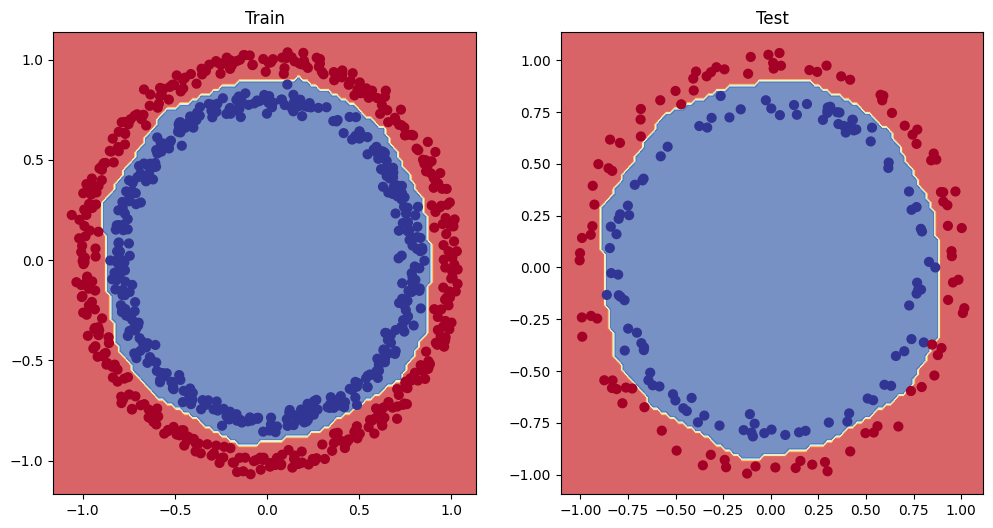

In [ ]:
# Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Improving a model (from a model prespective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function